In [5]:
#ex9.1 (Class Average: Writing Grades to a Plain Text File) 
# Figure 3.2 presented a class-average script in which you could enter any number of grades followed by a sentinel value, then calculate the class average. 
# Another approach would be to read the grades from a file. In an IPython session, write code that enables you to store any number of grades into a grades.txt plain text file

with open('grades.txt', 'w') as grades:
    grade = input('Enter grade (-1 to end):\n')
    while grade != '-1':
        #check grade is numeric:
        try:
            float(grade)
        except ValueError:
            grade = input(f'{grade} is not a valid grade, please enter a numeric grade: \n')
        #check grade is between 0 and 100:
        if float(grade) >100 or float(grade) < 0:
            grade = input(f'{grade} is not a valid grade, please enter a grade between 0 and 100: \n')
        else:
            grades.write(grade + '\n')
            grade = input('Enter grade (-1 to end):\n')




In [10]:
#ex9.2 (Class Average: Reading Grades from a Plain Text File) 
# In an IPython session, write code that reads the grades from the grades.txt file you created in the previous exercise. 
# Display the individual grades and their total, count and average

with open('grades.txt', 'r') as grades:
    total = 0
    count = 0
    print('grades')
    for grade in grades:
        print(grade, end = '')
        total += float(grade)
        count += 1
    print(f'total = {total}')
    print(f'count = {count}')
    print(f'mean = {total/count}')
    

grades
50
33
100
78
79
50
45
65
67
total = 567.0
count = 9
mean = 63.0


In [13]:
#ex9.3 (Class Average: Writing Student Records to a CSV File) 
# An instructor teaches a class in which each student takes three exams. 
# The instructor would like to store this information in a file named grades.csv for later use. 
# Write code that enables an instructor to enter each student’s first name and last name as strings and the student’s three exam grades as integers. 
# Use the csv module to write each record into the grades.csv file. Each record should be a single line of text in the following CSV format:
#  firstname,lastname,exam1grade,exam2grade,exam3grade

import csv

with open('grades.csv', 'w', newline = '') as grades:
    writer = csv.writer(grades)
    gradeinput = input('Enter grades in the format: firstname lastname grade1 grade2 grade3 (press enter to finish):\n')
    while gradeinput != '':
        grade = gradeinput.split()
        writer.writerow(grade)
        gradeinput = input('Enter grades in the format: firstname lastname grade1 grade2 grade3 (press enter to finish):\n')


In [16]:
#ex9.4 (Class Average: Reading Student Records from a CSV File) 
# Use the csv module to read the grades.csv file from the previous exercise. Display the data in tabular format.

import csv

with open('grades.csv', 'r', newline = '') as grades:
    reader = csv.reader(grades)
    print(f'{"First name":<12}{"Last name":<12}{"Grade 1":>10}{"Grade 2":>10}{"Grade 3":>10}')
    for record in reader:
        firstname, lastname, g1, g2, g3 = record
        print(f'{firstname:<12}{lastname:<12}{g1:>10}{g2:>10}{g3:>10}')


First name  Last name      Grade 1   Grade 2   Grade 3
Amy         Adams               65        70        76
Billy       Bob                 65        60        61
Charlie     Chaplin             80        75        71
Don         Donson              50        45        56


In [27]:
#ex9.5 (Class Average: Creating a Grade Report from a CSV File) 
# Modify your solution to the preceding exercise to create a grade report that displays each student’s average to the right 
# of that student’s row and the class average for each exam below that exam’s column.

import csv

with open('grades.csv', 'r', newline = '') as grades:
    reader = csv.reader(grades)
    print(f'{"First name":<12}{"Last name":<12}{"Grade 1":>10}{"Grade 2":>10}{"Grade 3":>10}{"Mean grade":>12}')
    g1_total = 0
    g2_total = 0
    g3_total = 0
    count = 0
    for record in reader:
        firstname, lastname, g1, g2, g3 = record
        g1_total += float(g1)
        g2_total += float(g2)
        g3_total += float(g3)
        count += 1
        g_avg = (float(g1) + float(g2) + float(g3))/3
        print(f'{firstname:<12}{lastname:<12}{g1:>10}{g2:>10}{g3:>10}{g_avg:>12.2f}')
    print(f'{"Class average (mean)":<24}{g1_total/count:>10.2f}{g2_total/count:>10.2f}{g3_total/count:>10.2f}')

First name  Last name      Grade 1   Grade 2   Grade 3  Mean grade
Amy         Adams               65        70        76       70.33
Billy       Bob                 65        60        61       62.00
Charlie     Chaplin             80        75        71       75.33
Don         Donson              50        45        56       50.33
Class average (mean)         65.00     62.50     66.00


In [30]:
#ex9.6 (Class Average: Writing a Gradebook Dictionary to a JSON File) 
# Reimplement Exercise 9.3 using the json module to write the student information to the file in JSON format. 
# For this exercise, create a dictionary of student data in the following format:
#   gradebook_dict = {'students': [student1dictionary, student2dictionary, ...]}
# Each dictionary in the list represents one student and contains the keys 'first_name', 'last_name', 'exam1', 'exam2' and 'exam3', 
# which map to the values representing each student’s first name (string), last name (string) and three exam scores (integers). 
# Output the gradebook_dict in JSON format to the file grades.json


import json

grade_list = []
gradeinput = input('Enter grades in the format: firstname lastname grade1 grade2 grade3 (press enter to finish):\n')
while gradeinput != '':
    grade = gradeinput.split()
    firstname, lastname, g1, g2, g3 = grade
    grade_list.append({'firstname':firstname, 'lastname':lastname, 'grade1':int(g1), 'grade2':int(g2), 'grade3':int(g3)})
    gradeinput = input('Enter grades in the format: firstname lastname grade1 grade2 grade3 (press enter to finish):\n')

grade_dict = {'students': grade_list}

with open('grades.json', 'w') as grades:
    json.dump(grade_dict, grades)


In [46]:
#ex9.7 (Class Average: Reading a Gradebook Dictionary from a JSON File) 
# Reimplement Exercise 9.4 using the json module to read the grades.json file created in the previous exercise. 
# Display the data in tabular format, including an additional column showing each student’s average to the right of that student’s 
# three exam grades and an additional row showing the class average on each exam below that exam’s column

import json

with open('grades.json', 'r') as grades_json:
    grades = json.load(grades_json)

print(f'{"First name":<12}{"Last name":<12}{"Grade 1":>10}{"Grade 2":>10}{"Grade 3":>10}{"Mean grade":>12}')
g1_sum = 0
g2_sum = 0
g3_sum = 0
count = 0
for student in grades['students']:
    firstname, lastname, g1, g2, g3 = student.values()
    g1_sum += g1
    g2_sum += g2
    g3_sum += g3
    count +=1
    student_mean = (g1 + g2 + g3)/3
    print(f'{firstname:<12}{lastname:<12}{g1:>10}{g2:>10}{g3:>10}{student_mean:>12}')
print(f'{"Class mean grade:":<24}{g1_sum/count:>10.2f}{g2_sum/count:>10.2f}{g3_sum/count:>10.2f}')
    

First name  Last name      Grade 1   Grade 2   Grade 3  Mean grade
Amy         Adams               60        70        80        70.0
Ben         Benson              70        80        90        80.0
Carl        Carlson             60        50        70        60.0
Don         Donson              80        90        70        80.0
Class mean grade:            67.50     72.50     77.50


In [6]:
#ex9.10 (Project: Analyzing a Book from Project Gutenberg) 
# Download the text-file version of Pride and Prejudice from Project Gutenberg
#  https://www.gutenberg.org/ebooks/1342
#  Create a script that reads Pride and Prejudice from a text file. 
# Produce statistics about the book, including the total word count, the total character count, the average word length, the average sentence length, 
# a word distribution containing frequency counts of all words, and the top 10 longest words. 

# In the “Natural Language Processing (NLP)” chapter, you’ll find lots of more sophisticated techniques for analyzing and comparing such texts.
#  Each Project Gutenberg e-book begins and ends with some additional text, such as licensing information, which is not part of the e-book itself. 
# You may want to remove that text from your copy of the book before analyzing its text

import numpy as np
import re

wordcount = 0
charcount = 0
wordlength = []
words = []
with open('PrideAndPrejudice.txt', 'r') as pride:
    for line in pride:
        wordcount += len(line.split())
        charcount += len(line)
        for word in line.split():
            wordlength.append(len(word))
            words.append(word)
    print(f'Total word count = {wordcount}')
    print(f'Character count (including spaces) = {charcount}')
    print(f'Average word length = {sum(wordlength)/len(wordlength):.2f} letters')
    #get the number of words per sentence by joining the words list to a list of sentences (separated by ".") then counting the number of words per sentence
    sentences = (' '.join(words))
    sentence_length = [len(i.split()) for i in sentences.split('.')]
    print(f'Average sentence length = {sum(sentence_length)/len(sentence_length):.2f} words')
    #create dictionary to record number of occurences of each word (all lowercase, without punctuation or non alphanumeric characters)
    sentences = sentences.lower()
    #note some words are joined by '--' instead of a space - replace '-' with space
    sentences = re.sub('-', ' ', sentences)
    letters = [letter for letter in sentences if (letter.isalpha() or letter.isspace()) and letter not in ['ï']]
    wordlist = ''.join(letters).split()
    word, freq = np.unique(wordlist, return_counts=True)
    wordfreq = list(zip(word, freq))
    wordfreq = sorted(wordfreq, reverse = True, key = lambda x: x[1])
    print('\nWord distribution with frequency counts (sorted from most to least frequent):')
    print('\n(Only displaying top 10 here)')
    print(f'{"Word":<20}{"Frequency":>10}')
    for row in wordfreq[0:10]:
        w, f = row
        print(f'{w:<20}{f:>10}')
    #To get the top 10 longest words, count the letters in each word in wordlist (which have already been stripped of non-alpha characters)
    #but first remove duplicates:
    wordlist = np.unique(wordlist)
    wordlengths = [len(word) for word in wordlist]
    # then zip the wordlist and wordlengths lists together and display the top 10 longest words
    longwords = list(zip(wordlist, wordlengths))
    print('\nTop 10 longest words:')
    longwords = sorted(longwords, reverse = True, key = lambda x: x[1])[0:200]
    print(f'{" ":<3}{"Word":<20}{"Length":>7}')
    i = 1
    for row in longwords[0:10]:
        w, l = row
        print(f'{i:<3}{w:<20}{l:>7}')
        i += 1


Total word count = 121810
Character count (including spaces) = 690669
Average word length = 4.62 letters
Average sentence length = 19.43 words

Word distribution with frequency counts (sorted from most to least frequent):

(Only displaying top 10 here)
Word                 Frequency
the                       4338
to                        4162
of                        3630
and                       3586
her                       2224
i                         2074
a                         1943
in                        1882
was                       1847
she                       1709

Top 10 longest words:
   Word                 Length
1  communicativeness        17
2  disinterestedness        17
3  misrepresentation        17
4  discontentedness         16
5  incomprehensible         16
6  superciliousness         16
7  accomplishments          15
8  acknowledgments          15
9  condescendingly          15
10 congratulations          15


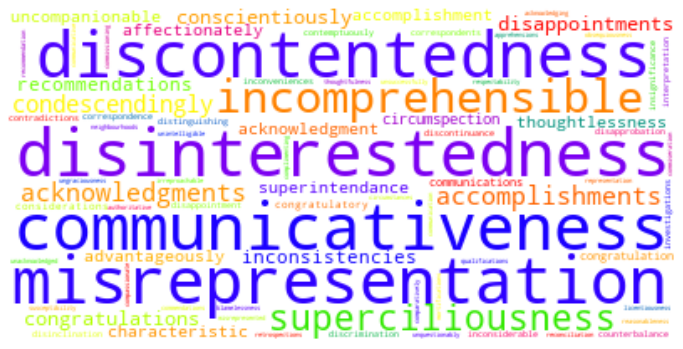

In [11]:
#ex9.11 (Project: Visualizing Word Frequencies with a Word Cloud) 
# A word cloud visualizes words, displaying more frequently occurring words in larger fonts. 
# In this exercise, you’ll create a word cloud that visualizes the top 200 words in Pride and Prejudice. 
# You’ll use the open-source wordcloud module’s15 WordCloud class to generate a word cloud with just a few lines of code.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

#use longwords list from previous code chunk
#turn longwords (list of tuples) into a dictionary:
longwords_dict = {k:v for (k, v) in longwords}

wordcloud = WordCloud(colormap = 'prism', background_color = 'white')
wordcloud = wordcloud.fit_words(longwords_dict)
#wordcloud = wordcloud.to_file('PrideAndPrejudice.png')
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [39]:
#ex9.15 (Project: Working with CSV Datasets Using the csv Module) 
# In the Intro to Data Science section, we loaded the Titanic disaster dataset into a pandas DataFrame, 
# then used DataFrame capabilities to perform some simple analysis of that data. For this exercise, use the csv module to read the Titanic disaster dataset, 
# then manually count the records that contain a value for the age column. Those that do not will have the value 'NA'. For only those records that have an age value, calculate the average age. 
# For this exercise, investigate and use the csv module’s DictReader class.


import csv

ages = []
with open('TitanicSurvival.csv', 'r', newline = '') as titanic:
    # reader = csv.reader(titanic)
    # for record in reader:
    #     age = record[3]
    #     try:
    #         int(age)
    #     except ValueError:
    #         pass
    #     try:
    #         float(age)
    #     except ValueError:
    #         pass
    #     else:
    #         ages.append(age)
    reader = csv.DictReader(titanic)
    for record in reader:
        try:
            int(record['age'])
        except ValueError:
            pass
        try: 
            float(record['age'])
        except ValueError:
            pass
        else:
            ages.append(float(age))
print(f'There are {len(ages)} ages recorded in the dataset.')
print(f'The average age is {sum(ages)/len(ages)}')

There are 1046 ages recorded in the dataset.
The average age is 29.0


In [ ]:
#ex9.16 (Working with the diamonds.csv Dataset in Pandas) 
# Datasets are available for almost anything you’d want to study. 
#  There are numerous dataset repositories from which you can download datasets in CSV and other formats. In this chapter, we mentioned:
#  https://vincentarelbundock.github.io/Rdatasets/datasets.html and https://github.com/awesomedata/awesome-public-datasets
#  The Kaggle competition site: https://www.kaggle.com/datasets?filetype=csv has approximately 11,000 datasets with over 7500 in CSV format. 
#  The U.S. government’s data.gov site: https://catalog.data.gov/dataset?res_format=CSV&_res_format_limit=0 has over 300,000 datasets with approximately 19,000 in CSV format.

#  In this exercise, you’ll use the diamonds dataset to perform tasks similar to those you saw in the Intro to Data Science section. 
#  This dataset is available as diamonds.csv from various sources, including the Kaggle and Rdatasets sites listed above. 
#  The dataset contains information on 53,940 diamonds, including each diamond’s carats, cut, color, clarity, depth, table (flat top surface), price and x, y and z measurements. 
#  The Kaggle site’s web page for this dataset describes each column’s content.17 17. https://www.kaggle.com/shivam2503/diamonds.
#  Perform the following tasks to study and analyze the diamonds dataset:

#  1. Download diamonds.csv from one of the dataset repositories.
#  2. Load the dataset into a pandas DataFrame with the following statement, which uses the first column of each record as the row index:
#       df = pd.read_csv('diamonds.csv', index_col=0)
#  3. Display the first seven rows of the DataFrame
#  4. Display the last seven rows of the DataFrame.
#  5. Use the DataFrame method describe (which looks only at the numerical columns) to calculate the descriptive statistics for the numerical columns—carat, depth, table, price, x, y and z.
#  6. Use Series method describe to calculate the descriptive statistics for the categorical data (text) columns—cut, color and clarity.
#  7. What are the unique category values (use the Series method unique)?
#  8. Pandas has many built-in graphing capabilities. Execute the %matplotlib magic to enable Matplotlib support in IPython. 
#     Then, to view histograms of each numerical data column, call your DataFrame’s hist method. The following figure shows the results for the DataFrame’s seven numerical column

import pandas as pd

df = pd.read_csv('diamonds.csv', index_col=0)

print('First 7 rows:')
print(df.head(7))

print('\nLast 7 rows:')
print(df.tail(7))

print('\nDescriptives (numerical columns):')
print(df.describe())

print('\nDescriptives (text columns):')
print(df[['cut', 'color', 'clarity']].describe(include = 'all'))

print('\nUnique values of "cut":')
print(df.cut.unique())
print('\nUnique values of "color":')
print(df.color.unique())
print('\nUnique values of "clarity":')
print(df.clarity.unique())

%matplotlib qt

df.hist()


First 7 rows:
   carat        cut color clarity  depth  table  price     x     y     z
1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47

Last 7 rows:
       carat        cut color clarity  depth  table  price     x     y     z
53934   0.70  Very Good     E     VS2   61.2   59.0   2757  5.69  5.72  3.49
53935   0.72    Premium     D     SI1   62.7   59.0   2757  5.69  5.73  3.58
53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
539

ImportError: Cannot load backend 'TkAgg' which requires the 'tk' interactive framework, as 'qt' is currently running

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Derek\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Derek\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Derek\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Derek\AppData\Local\Programs\Python\Python39\lib\asyncio\selector_events.py", line 120, in _read_from_self
 

: 